最初に必要なライブラリを読み込みます。

In [18]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit, QubitBra, measure_all, measure_all_oneshot,measure_partial, matrix_to_qubit
from sympy.physics.quantum.gate import H,X,Y,Z,S,T,CPHASE,CNOT,SWAP,UGate,CGateS,gate_simp,OneQubitGate
from sympy.physics.quantum.gate import IdentityGate as _I
from sympy.physics.quantum.qft import *
from sympy.physics.quantum.matrixcache import matrix_cache
matrix_cache.cache_matrix('Tdg',Matrix([[1, 0], [0, exp(-I*pi/4)]]))
matrix_cache.cache_matrix('Sdg',Matrix([[1, 0], [0, -I]]))
matrix_cache.cache_matrix('V',(1/2)*Matrix([[1+I, 1-I], [1-I, 1+I]]))
matrix_cache.cache_matrix('Vdg',(1/2)*Matrix([[1-I, 1+I], [1+I, 1-I]]))

CZ = CPHASE

class Tdg(OneQubitGate): # T^{\dagger} 演算
    gate_name = u'Tdg'
    gate_name_latex = u'T^{\dagger}'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('Tdg', format)

class Sdg(OneQubitGate): # S^{\dagger} 演算
    gate_name = u'Sdg'
    gate_name_latex = u'S^{\dagger}'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('Sdg', format)

class V(OneQubitGate): # √X 演算
    gate_name = u'V'
    gate_name_latex = u'V'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('V', format)

class Vdg(OneQubitGate): # √X ^{\dagger}演算
    gate_name = u'Vdg'
    gate_name_latex = u'V^{\dagger}'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('Vdg', format)

def CV(c,t):  return CGateS((c),V(t))
def CVdg(c,t):  return CGateS((c),Vdg(t))

def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))
def Toffoli(c1,c2,t):  return CGateS((c1,c2),X(t))
def CCZ(c1,c2,t): return (H(t)*CCX(c1,c2,t)*H(t)) # CCZ演算子を定義します。
def hadamard(s,n):
    h = H(s)
    for i in range(s+1,n+s): h = H(i)*h
    return h

def disp1Q(u): print(u); display(represent(u,nqubits=1)); CircuitPlot(u,nqubits=1)
def disp2Q(u): print(u); display(represent(u,nqubits=2)); CircuitPlot(u,nqubits=2)

from sympy.printing.dot import dotprint
init_printing()

%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate
alpha, beta, gamma, delta = Symbol(r'\alpha'), Symbol(r'\beta'), Symbol(r'\gamma'), Symbol(r'\delta'), 
psi, phi, theta, chi = Symbol(r'\psi'), Symbol(r'\phi'), Symbol(r'\theta'), Symbol(r'\chi') 
from qutip import *
import numpy as np

（副読本）
* ニールセン・チャン「量子コンピュータと量子通信」（ここでは N,C"QCQI" と書きます）
* arXivに公開されている論文

# 第2章 量子コンピュータの基本
## 2.5 補助量子ビットと逆演算

* 補助量子ビット

  量子計算のために、主たる量子情報を扱う量子ビット以外に付加する量子ビット

**（課題）補助量子ビットを利用したあとの初期化**

  ※量子計算の途中で（測定を伴う）初期化しなければ放っておけばよいですが・・・

* 逆演算（uncomputaion）

  補助量子ビットを含めた量子ビットに、目的の量子計算 $ U_{f} $ を行い、その逆演算 $ U_{f}^{-1} $ をほどこして補助量子ビットを元に戻す操作。

  

## 2.6 量子コンピュータにデータを入力する
### 2.6.1 デジタル入力（基底エンコーディング）

* 基底エンコーディング

　　古典データの $n$ ビット列をそのまま量子ビットに置き換える
  
  →確率振幅の増幅（Amplitude Amplification）を使ったアルゴリズムで利用される

 * 浮動小数点数の形式 
 
   古典では IEEE754 が標準的ですが、明確な定めは未だない
   

(18) "Quantum circuits for foating-point arithmetic"による提案

$x \approx (-1)^{x_S} x_{M} \cdot 2 ^ {x_{E}}$

### 2.6.2 アナログ入力（振幅エンコーディング）

 * 振幅エンコーディング
 
 　　古典データからなる $ 2^{n} $ 次元のベクトル　（「データ列」と考えても良い）　を量子ビットの確率振幅に情報として埋め込む
   
 →目的の量子状態をどのように生成するのか？が難しい問題
 
 テキストでは、単に実数域で、規格化しているデータをエンコードしている例がありますが、複素数域まで含めたエンコーディングも考えられる
 
→<font color="red">QRAM（後述）を使うとできるらしい</font>

※参考文献「(20) Quantum Analog-Digital Conversion」(Mitarai, Kitagawa, Fujii, 2018)は重要
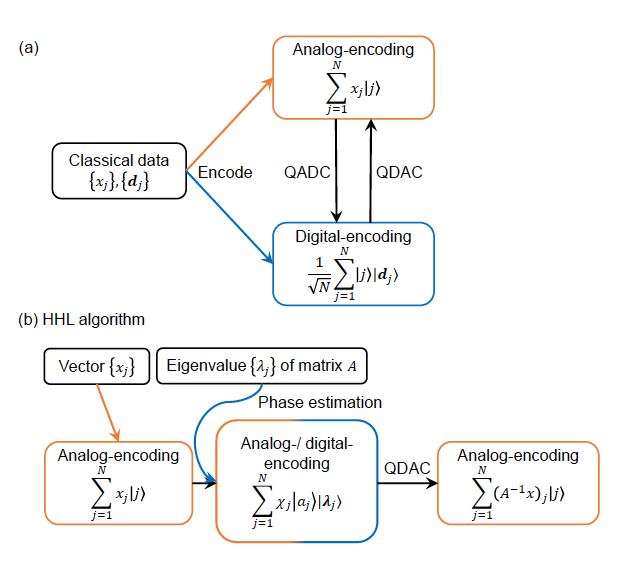

### 2.6.3 量子ゲートにデータを埋め込む

* ハミルトニアンエンコーディング　　
* ダイナミックエンコーディング　　
* 行列エンコーディング　　

１）　エルミートでない行列　→　エルミート行列

$ A \longrightarrow \tilde{A} = \left( \begin{matrix}
0 & A \\ 
A^{\dagger}  & 0
\end{matrix} \right)$

２）　エルミート行列　→　ユニタリ行列　　　（COLUMN p.22）

$ \tilde{A} \longrightarrow e ^ {i \tilde{A}}$


→埋め込みたい行列より大きなサイズのユニタリ行列を扱う必要がある点、そのユニタリ行列を量子回路げ表現しなければならない点でエンコーディングも難しい

Hamiltonian が提示されるような、純粋な量子力学系、量子化学系の問題には適合するケースがありそう

## 2.7 量子コンピュータのデータ前処理
### 2.7.1 量子ランダムアクセスメモリ（QRAM）とは？

 * QRAM　
 
古典のRAM のような機構・・・量子状態を保持してREAD/WRITEできる  
＋　アドレッシングも量子状態を許容する  

・・・**現時点では概念的な話題で、実質的に実装ができているわけではない。**

 * 量子トリット（qutrit）
 
３値の量子状態（たとえば、$\lvert 0 \rangle, \lvert 1 \rangle, \lvert 2 \rangle$）をもつ情報単位

３進数のような情報で、qubit の $\lvert 00 \rangle, \lvert 01 \rangle, \lvert 10 \rangle$とは本質的に異なります

物理的にも３準位の量子系を用いれば、理論上実装は可能なはずです　　

### 2.7.2 QRAMを使った振幅エンコーディング

TBD

### 2.7.3 データ木構造を使った振幅エンコーディング

TBD

## 2.8 もっと一般の量子状態を扱うには・・・

**keywords**
    
    
* 純粋状態
* 混合状態
* 密度行列

* 「トレース」「部分トレース」

純粋状態を扱うより、一般的であるため、混合状態を扱うことも実際の量子計算の現場では多いようです。

これまでに量子状態としてみていた $\lvert 0 \dots \rangle $や$\lvert 1 \dots \rangle $ という記述は「純粋状態」を表しています。  
※学習のうえでは、この「純粋状態」で学ぶのがよいです。アルゴリズムの理解などには純粋状態が都合がよいはずです。

純粋状態 $\lvert \psi \rangle $ の密度行列は、 $ \rho_{pure} = \lvert \psi \rangle \langle \psi \rvert $

混合状態の密度行列は、 $ \displaystyle \rho_{mix} = \sum _{i} p_{i} \lvert \psi _{i} \rangle \langle \psi _{i} \rvert $

In [56]:
ket0 = Qubit('0')
rho_0 =  ket0 * Dagger(ket0)

In [57]:
# | 0 >
represent(ket0)

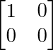

In [58]:
# |0><0|
represent(rho_0, nqubits=1)

In [59]:
ket1 = Qubit('1')
rho_1 =  ket1 * Dagger(ket1)

In [60]:
# | 1 >
represent(ket1)

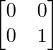

In [61]:
# |1><1|
represent(rho_1, nqubits=1)

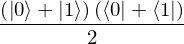

In [62]:
ket_plus = 1/sqrt(2)* (Qubit('0')+Qubit('1'))
rho_pure =  (ket_plus) * Dagger(ket_plus)
rho_pure

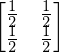

In [63]:
represent(rho_pure, nqubits=1)

In [64]:
ket_psi = alpha * Qubit('0')+ beta * Qubit('1')
psi_pure =  (ket_psi) * Dagger(ket_psi)
psi_pure

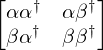

In [65]:
represent(psi_pure, nqubits=1)

トレース＝ 1 である.   $ \alpha \alpha ^{\dagger} + \beta \beta ^{\dagger} = 1 $

In [66]:
trace(represent(psi_pure, nqubits=1))

In [72]:
rho_mix = 1/2 * ( p_0 + p_1 ) 
rho_mix

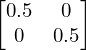

In [73]:
represent(rho_mix, nqubits=2)

In [74]:
trace(represent(rho_mix, nqubits=2))

In [75]:
p_mix, p_pure = Symbol(r'p_{mix}'),Symbol(r'p_{pure}')
p_mix, p_pure

$ \rho = p_{mix} * \rho_{mix} + p_{pure} * \rho_{pure}$

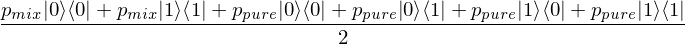

In [81]:
simplify(expand(p_mix * rho_mix + p_pure * rho_pure))

**ユニタリ演算**

純粋状態では、$ \lvert \psi \rangle \xrightarrow[]{U} U \lvert \psi  \rangle $


密度行列に対するユニタリ演算 ：

$ \displaystyle \rho = \sum _{i} p_{i} \lvert \psi _{i} \rangle \langle \psi _{i} \rvert
\xrightarrow[]{U} \sum _{i} p_{i} U \lvert \psi _{i} \rangle \langle \psi _{i} \rvert U ^{\dagger} 
= U \Big( \sum _{i} p_{i} \lvert \psi _{i} \rangle \langle \psi _{i} \rvert \Big) U ^{\dagger} 
= U \rho U ^{\dagger} $

密度行列を使った測定 $ M $

In [83]:
# TBD

部分トレース（一部の系を測定する）

In [84]:
# TBD